In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time
from matplotlib import gridspec
from simulate import simulate

In [6]:
N = 100
N_ill = 1
Lx = Ly = 30
stepSize = 0.5
infection_rate = 0.01
tile_infection_rate = pollution_rate = 0.2
flow_rate = 0
tMax = 600
shuffled_pollution_activate = False
animatable_output = True
centralized_infectious = False
state_after_infection = 1 #1 for SEI, 2 for SI
opening_duration = 0 #flash_forward every ...

In [10]:
args = N, N_ill, Lx, Ly, stepSize, infection_rate, pollution_rate\
        , tile_infection_rate, flow_rate, tMax,\
        shuffled_pollution_activate, animatable_output,\
        centralized_infectious, state_after_infection,\
        opening_duration

In [11]:
timeline = simulate(args = args)

In [3]:
pollution_history = np.load('Results/pollution_history.npy')
agents_history = np.load('Results/agents_history.npy')
#args = 100, 1, 30, 30, 0.5, 0.01, 0.99, 0.99, 0., 400
#N, N_ill, Lx, Ly, stepSize, infection_rate, pollution_rate, tile_infection_rate, flow_rate, tMax = args


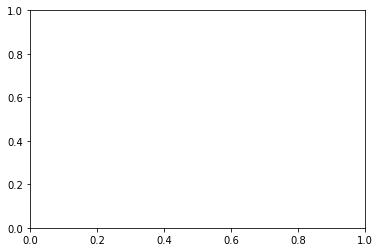

In [10]:
#figure_ratio = 0.75
#figure_ratio = 100
#fig = plt.figure(figsize=(5*(0.9+figure_ratio), 5 ) )
#fig.subplots_adjust(wspace = 0)
#gs = gridspec.GridSpec(1, 2, width_ratios=[1, figure_ratio]) 
#ax = plt.subplot(gs[0])

fig = plt.figure()
ax = fig.add_subplot(111)


def animate(t):
    ax.clear()
#     walk()
#     update_tile()
#     pollute()
    pollution = pollution_history[t]
    agents = agents_history[t]
    
    ax.imshow(pollution.T, extent =[0,Lx, 0,Ly], vmin=0, vmax=tile_infection_rate, origin = 'lower')
#     ax.imshow(pollution.T, extent =[0,30, 0,30], origin = 'lower')
#     plt.plot(agents['x'], agents['y'])
    ax.plot(agents['x'][ agents['health'] == 0 ], agents['y'][ agents['health'] == 0 ], 'o', alpha = 0.5, markersize=4)
    ax.plot(agents['x'][ agents['health'] == 2 ], agents['y'][ agents['health'] == 2 ], 'ro', alpha = 0.5, markersize=4)
    ax.plot(agents['x'][ agents['health'] == 1 ], agents['y'][ agents['health'] == 1 ], 'go', alpha = 0.5, markersize=4)
    
    #disease_timeline[t] = N - get_infetced()


    #ax.text(0 , 0.5 , "$t$ ="+ str(t) )

In [11]:
ani = animation.FuncAnimation(fig, animate, save_count = 99999)

dpi = 200
writer = animation.writers['ffmpeg'](fps = 20)
# file_name = str(time.gmtime()[0:5]) + '.GIF'
file_name = str(time.gmtime()[0:5]) + '.mp4'
# ani.save( file_name ,dpi=dpi, writer = 'imagemagick')
ani.save( file_name, dpi=dpi, writer = writer)
file_name

IndexError: index 600 is out of bounds for axis 0 with size 600